<a href="https://colab.research.google.com/github/mequanent/HCC-2022/blob/main/Music%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [18]:
import pandas as pd
import numpy as np

#import urllib.request
import requests
from pandas.io.json import json_normalize


meta_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Digital_Music.json.gz"
ratings_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Digital_Music.csv"
reviews_url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Digital_Music_5.json.gz"

columns = ['reviewrId', 'musicId', 'rating', 'reviewTime']

ratings_only = pd.read_csv(ratings_url, header=None)
ratings_only.columns = columns
music_reviews = pd.read_json(reviews_url, lines = True)

ratings_only.head(2)

,reviewrId,musicId,rating,reviewTime
0,A2EFCYXHNK06IS,5555991584,5.0,978480000
1,A1WR23ER5HMAA9,5555991584,5.0,953424000


In [19]:
music_reviews.rename(columns = {'reviewerID':'reviewerId', 'overall':'rating', 'asin':'musicId'}, inplace = True)
music_reviews.head(2)

,reviewerId,musicId,reviewerName,helpful,reviewText,rating,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5,Enya at her most elegant,991526400,"06 3, 2001"


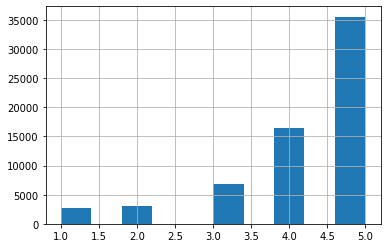

In [20]:
music_reviews['rating'].hist()

In [17]:
#meta = pd.read_json(meta_url, lines = True)

In [21]:
music_reviews.musicId.value_counts()

B0007NFL18    272
B000084T18    271
B00006690F    204
B00004T9UF    202
B00005YW4H    190
             ... 
B0002OOUS2      5
B0002XEDJE      5
B00064183I      5
B00064AEJM      5
B00KILDVEI      5
Name: musicId, Length: 3568, dtype: int64

In [22]:
music_reviews.reviewerId.value_counts()

A9Q28YTLYREO7     578
A3HU0B9XUEVHIM    375
A3KJ6JAZPH382D    301
A3C6ZCBUNXUT7V    261
A8IFUOL8S9BZC     256
                 ... 
A3MHB30XYTWSIC      5
AAQ992EC4K6U8       5
A26DPJ5DLJOT2O      5
A2H22I2RWE0HOV      5
ASOK6X7HSN7S9       5
Name: reviewerId, Length: 5541, dtype: int64

In [23]:
music_reviews.reviewerName.value_counts()

mistermaxxx08 "mistermaxxx08"            575
Andre S. Grindle "Andre' Grindle"        375
Tim Brough "author and music buff"       301
G$ "Z-Wad"                               261
IRate                                    256
                                        ... 
C.C. Arty (whoa-oa-oa) "feenikslintu"      2
meeshy_a                                   2
Barb23091                                  1
Victor Ochoa "fan of music"                1
Robert 3086                                1
Name: reviewerName, Length: 5426, dtype: int64

In [24]:
music_reviews.loc[:,['reviewerId', 'musicId', 'rating']]

,reviewerId,musicId,rating
0,A3EBHHCZO6V2A4,5555991584,5
1,AZPWAXJG9OJXV,5555991584,5
2,A38IRL0X2T4DPF,5555991584,5
3,A22IK3I6U76GX0,5555991584,5
4,A1AISPOIIHTHXX,5555991584,4
...,...,...,...
64701,A1PQ1PESSO8CMO,B00KILDVEI,4
64702,A120RH58WVY4W6,B00KILDVEI,5
64703,A19VJ2IQLO50G0,B00KILDVEI,5
64704,AUDSM2CTLLW1Q,B00KILDVEI,3


In [32]:
meta = pd.read_json('meta_Apps_for_Android_copy.json', lines = True, orient = "split")

ValueError: ignored